[View in Colaboratory](https://colab.research.google.com/github/kanokwan1994/AUAISummer2018/blob/master/Reducing_Loss_Learning_Rate.ipynb)

In [0]:
## Reducing Loss:Learning Rate


## Reducing Loss:Learning Rate


#loss


Instructions for updating:
Use `tf.global_variables_initializer` instead.


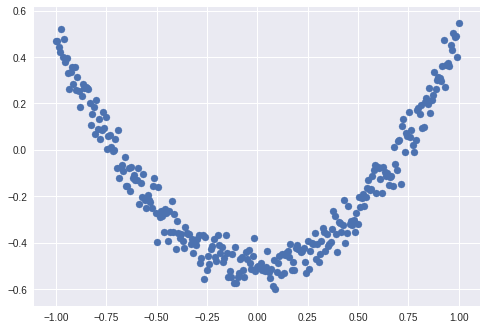

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_funciton=None):
    #add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases =tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases

    if activation_funciton is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_funciton(Wx_plus_b)
    return outputs

#Make up some real data
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

#defin placeholder for inputs to network
xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32,[None, 1])

#add hidden layer
l1= add_layer(xs,1,10,activation_funciton=tf.nn.relu)
#add output layer
prediction = add_layer(l1, 10, 1, activation_funciton=None)


#the error between prefiction and real data
loss =tf.reduce_mean(tf.reduce_sum (tf.square(ys- prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

#
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        #print(sess.run(loss,feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data,ys:y_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw = 5 )
        plt.pause(0.1)
        plt.show()